<a href="https://colab.research.google.com/github/martaherraiz/ProcesamientoMultimedia/blob/main/MorfologiaCoins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


gray elements: (738, 1000)


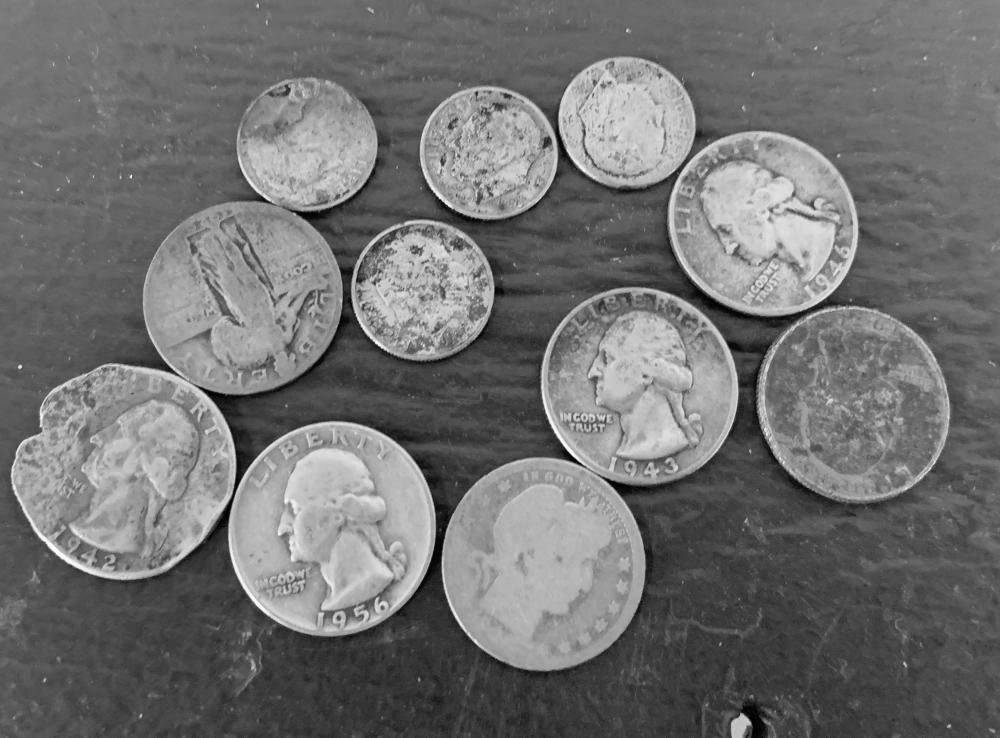

In [15]:
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("gray elements:",gray.shape)
cv2_imshow(gray)


Primero, se aplicará un filtro gaussiano para reducir el ruido, saldrá una imagen un poco desenfocada. Hay que tener en cuenta que cv2_imshow espera una imagen en formato RGB, no en blanco y negro, por lo que la convertimos a escala de grises.

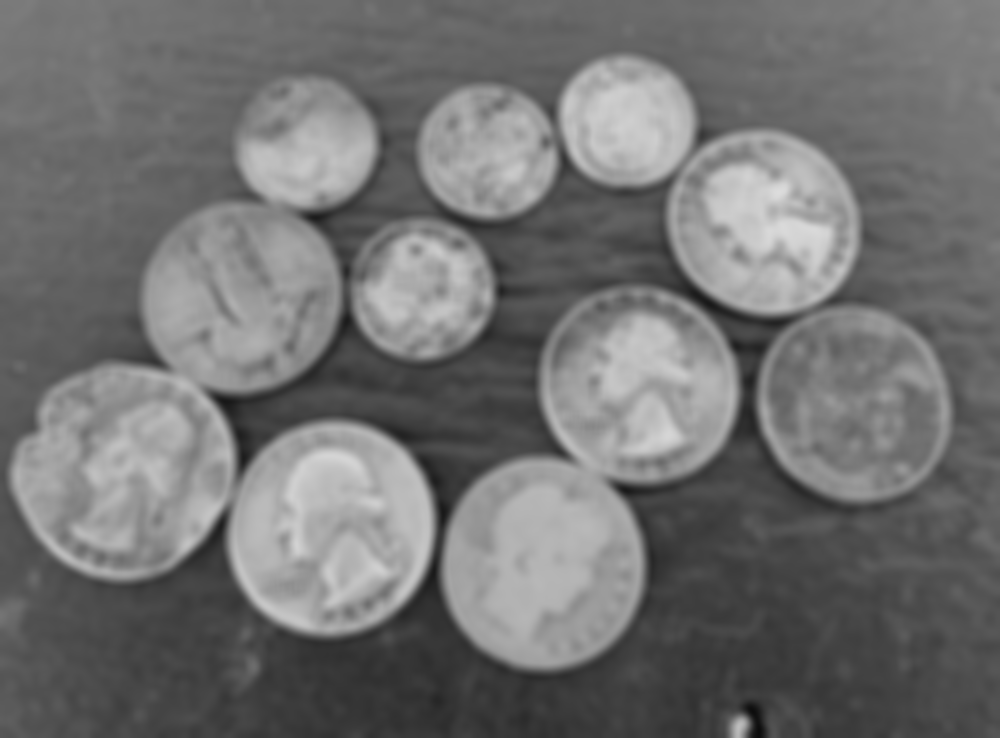

In [16]:
blurred = cv2.GaussianBlur(gray, (15, 15), 5)
blurred_display = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)


cv2_imshow(blurred_display)

Usando la imagen borrosa anterior se aplica un filtro de umbral (thresholding) donde los píxeles superiores a 150 se convertirán en blancos (255) y los menores en negro.

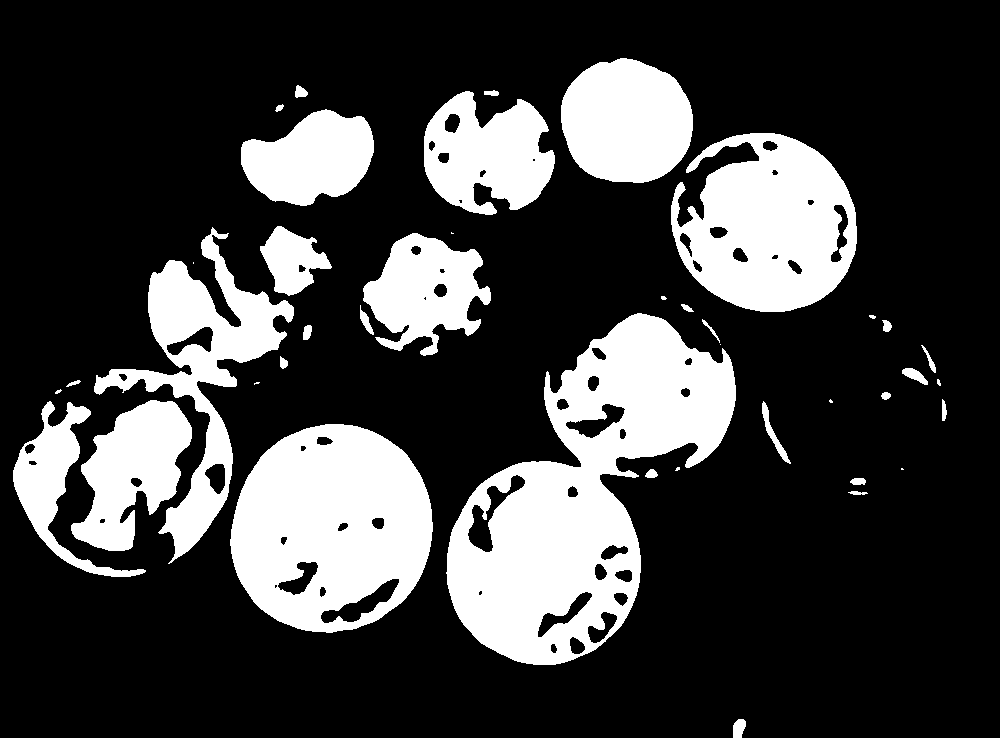

In [17]:
ret, binary = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

# Convertir la imagen binarizada de vuelta a BGR para mostrarla
binary_display = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2_imshow(binary_display)

Ahora se usará la función de rellenar los huecos, para que aquellos que no se hayan rellenado de blanco entero o de negro entero lo hagan y se distingan mejor las formas. Se usa un dilate con un erode, es decir, un close. De esta forma se resaltan las zonas claras, por lo que si hay algún agujero en la zona oscura de blanco quedará tapado y viceversa.

cierre: se utiliza para eliminar pequeños agujeros en los objetos blancos de la imagen binarizada

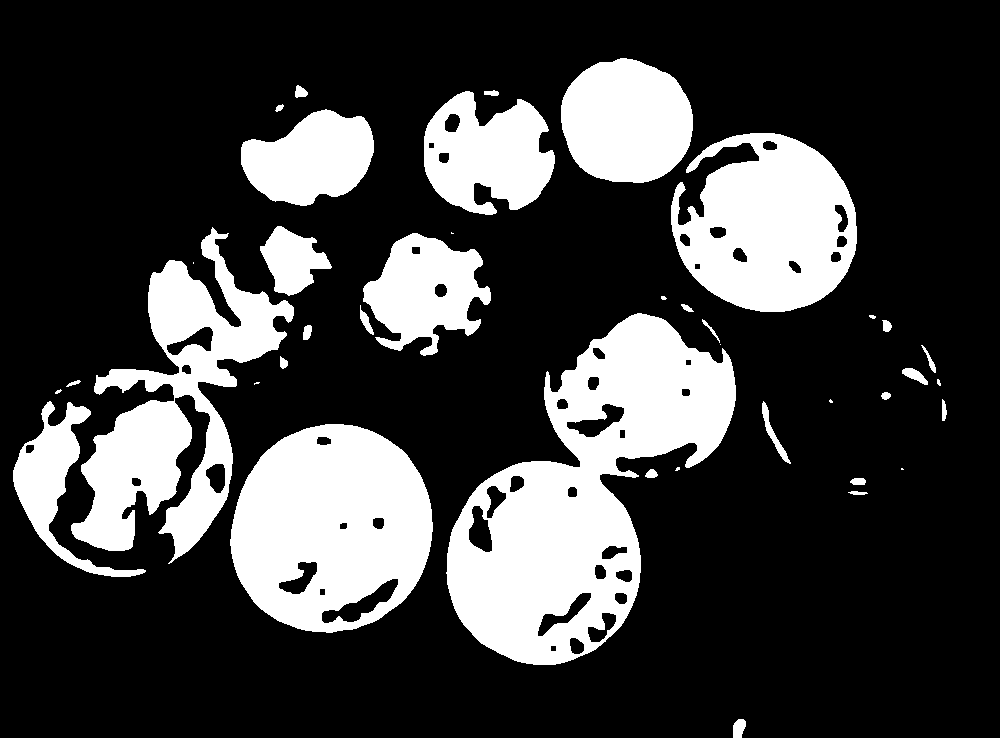

In [18]:
kernel = np.ones((5, 5), np.uint8)
# Crea un kernel de 10x10
Kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
# Aplica un close (dilate->erode) que resalta las zonas claras.
morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

morph_display = cv2.cvtColor(morph, cv2.COLOR_GRAY2BGR)
cv2_imshow(morph_display)

Detectamos los contornos en la imagen binarizada después de la operación morfológica. Los contornos son las formas de los objetos en la imagen. En este caso, estamos interesados en los objetos grandes (como las monedas).

Para ello, se define un área mínima que deben tener los contornos, en este caso las monedas. Si el área del contorno es mayor que el umbral mínimo (200), lo consideramos una “moneda”. Cuando se detecta una moneda se dibuja un rectángulo alrededor para señalarla.

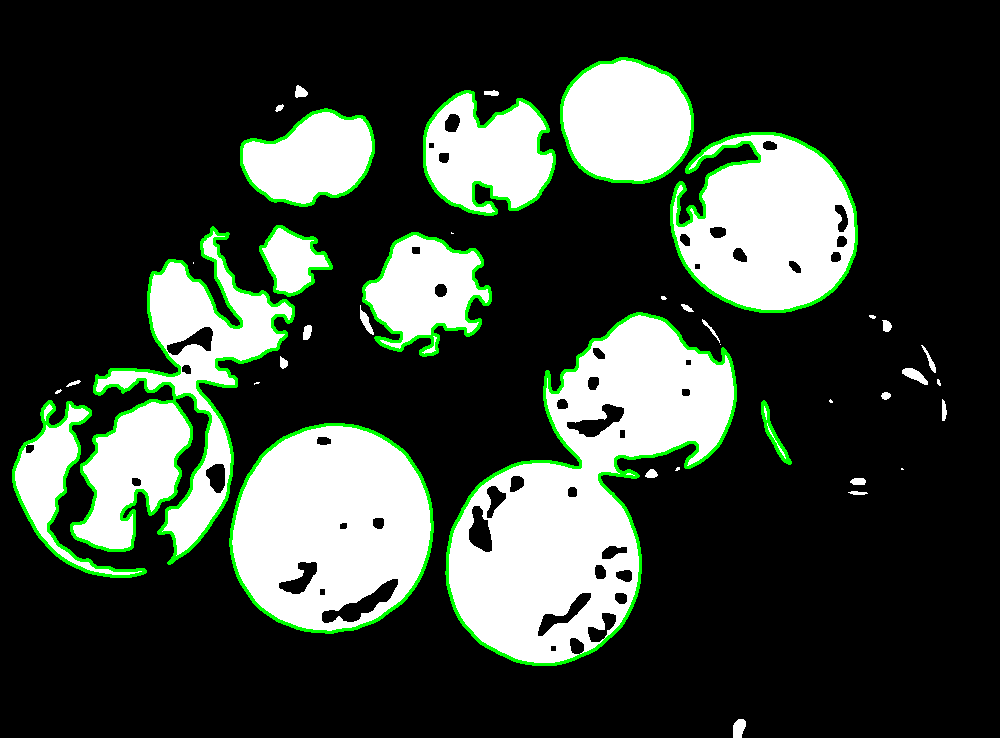

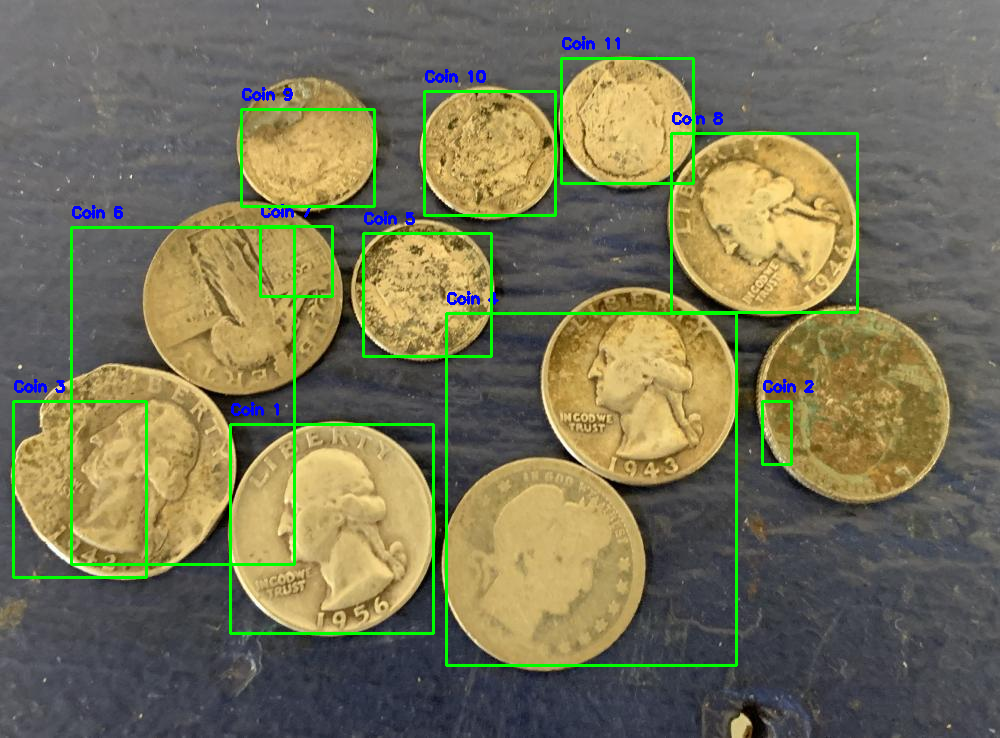

Number of coins detected: 11


In [19]:
# Encontrar contornos
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por área para eliminar artefactos pequeños
min_area = 200  # Umbral de área mínima; ajusta según el tamaño de la imagen
coin_count = 0  # Contador de monedas detectadas

# Procesar los contornos
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        # Dibujar contorno en la imagen original
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Dibujar rectángulo delimitador
        cv2.drawContours(morph_display, [contour], -1, (0, 255, 0), 2)

        # Añadir una etiqueta encima de la moneda
        label = f"Coin {coin_count + 1}"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        coin_count += 1

# Mostrar la imagen con los contornos detectados
cv2_imshow(morph_display)

# Mostrar la imagen original con las monedas etiquetadas
cv2_imshow(image)

# Imprimir el número de monedas detectadas
print("Number of coins detected:", coin_count)